In [33]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from wordcloud import WordCloud
from plotly.subplots import make_subplots
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

## **Unique Authors Data**

In [62]:
wacv = pd.read_csv(r"D:\Project Author Conference\Combined Dashboard\data\WACV through the years.csv")
cvpr = pd.read_csv(r"D:\Project Author Conference\Combined Dashboard\data\CVPR through the years.csv")
iccv = pd.read_csv(r"D:\Project Author Conference\Combined Dashboard\data\ICCV through the years.csv")
eccv = pd.read_csv(r"D:\Project Author Conference\Combined Dashboard\data\ECCV through the years.csv")
bmvc = pd.read_csv(r"D:\Project Author Conference\Combined Dashboard\data\BMVC through the years.csv")

combined_df = pd.concat([wacv, cvpr, iccv, eccv, bmvc], keys=['WACV', 'CVPR', 'ICCV', 'ECCV', 'BMVC'])

## **New Authors from Each Conferences**

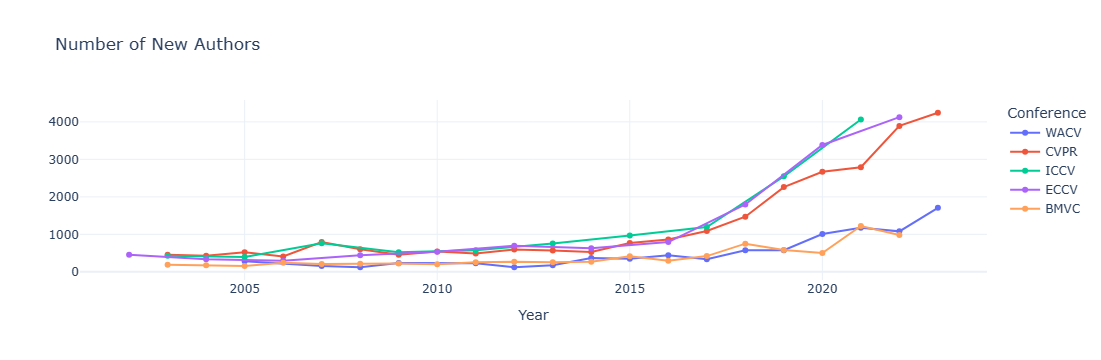

In [69]:
fig = px.line(combined_df, x='conference_year', y='unique_author_count', color='conference_name',
              markers=True, labels={'conference_year': 'Year', 'unique_author_count': '', 'conference_name': 'Conference'},
              title='Number of New Authors', template='plotly_white')

fig

In [85]:
conferences = combined_df.index.get_level_values(0).unique()

fig = sp.make_subplots(rows=3, cols=2, subplot_titles=[f'{conf}' for conf in conferences])

for i, conference in enumerate(conferences):
    conference_df = combined_df.loc[conference]
    row = i // 2 + 1  # Calculate the row index
    col = i % 2 + 1   # Calculate the column index
    trace = go.Scatter(x=conference_df['conference_year'],
                       y=conference_df['unique_author_count'],
                       mode='bars', name=f'{conference}')
    fig.add_trace(trace, row=row, col=col)

    fig.update_xaxes(matches='x', row=row, col=col)

fig.update_layout(height=600, width=1100, title_text="Number of New Authors in Different Conferences",
                  showlegend=False, template='plotly_white')

fig

ValueError: 
    Invalid value of type 'builtins.str' received for the 'mode' property of scatter
        Received value: 'bars'

    The 'mode' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['lines', 'markers', 'text'] joined with '+' characters
        (e.g. 'lines+markers')
        OR exactly one of ['none'] (e.g. 'none')

## **Number of Papers**

In [71]:
papers = pd.read_csv(r"D:\Project Author Conference\Combined Dashboard\data\Number of Papers by Conference Year.csv")
papers.head()

,Conference,Year,Number of Papers
0,BMVC,2003,82
1,BMVC,2004,100
2,BMVC,2005,96
3,BMVC,2006,130
4,BMVC,2007,114


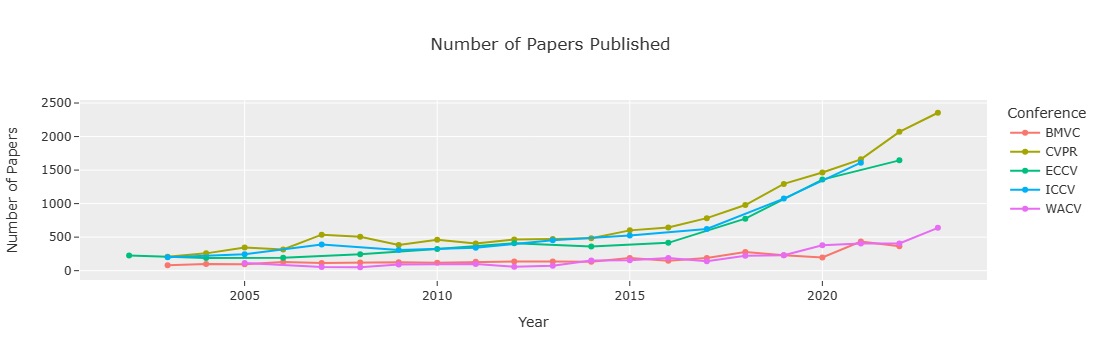

In [84]:
fig = px.line(papers, x='Year', y='Number of Papers', color='Conference', markers=True,
             title='Number of Papers Published', template='ggplot2')
fig